# <font color='blue'>RANDOM FOREST</font>

## Criando uma Decision Tree

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
# Carregando data set
irisData = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap09/dados_python/iris_data.csv")

In [7]:
irisData

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Visualiza as primeiras linhas
print(irisData.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


In [9]:
# Resumo estatístico
irisData.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
# Correlação 
irisData.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class'], dtype='object')

In [20]:
numericos = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
print(irisData[numericos].corr())

             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


In [21]:
# Atributos e Variável Target
feature = irisData[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
targetVariables = irisData.Class

In [22]:
# Gera os dados de treino
featureTrain, featureTest, targetTrain, targetTest = train_test_split(feature,
                                                                      targetVariables,
                                                                      test_size = .2)

In [29]:
featureTest.size

120

In [30]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [31]:
# Criação do modelo 
clf = DecisionTreeClassifier()

In [40]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [41]:
modelo = clf.fit(featureTrain, targetTrain)
previsoes = modelo.predict(featureTest)

In [45]:
confusion_matrix(targetTest, previsoes)

array([[10,  0,  0],
       [ 0,  9,  2],
       [ 0,  1,  8]], dtype=int64)

In [44]:
print(accuracy_score(targetTest, previsoes))

0.9


## <font color='red'>Random Forest Classifier - 1</font>

In [46]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
%matplotlib inline

In [47]:
# Gerando dataset
digitos = load_digits()

In [50]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [51]:
# Aplicando escala aos dados
data = scale(digitos.data)

In [52]:
data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [53]:
data.shape

(1797, 64)

In [55]:
# Obtém o nmr de observações e numeros de atributos 
n_observ, n_features = data.shape

# Extrai o numero de linhas e colunas do conjunto de dados

In [56]:
n_observ

1797

In [57]:
n_features

64

In [58]:
# Obtendo os labels
n_digits = len(np.unique(digitos.target))
labels = digitos.target

In [67]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

In [59]:
labels

array([0, 1, 2, ..., 8, 9, 8])

In [60]:
n_digits

10

In [68]:
# Criando o classificador
clf = RandomForestClassifier(n_estimators = 10)

### <font color='red'>OBSERVAÇÃO</font>

Os 4 principais parâremtros em modelos de Random Forest são:

<font color='green'>n_estimators</font> - Quanto maior, melhor. quantidade de árvores que serão criadas

<font color='green'>max depth</font> - O padrão é "none", e nesse caso, árvores completas são criadas. Ajustando esse parâmetro pode-se ajudar a evitar overfitting

<font color='green'>max_features</font> - Diferentes valores devem ser testados, pois este param impacta na forma com as quais os modelos RF distribuem os atributos pelas árvores

<font color='green'>criterion</font> - Define a forma como o algorítmo fará a divisão dos atributos e a classificação dos nós em cada árvore

In [69]:
# Construindo o modelo 
clf =  clf.fit(data, labels)

In [71]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
score = clf.score(data, labels)

In [74]:
print(score)

# Provavel overfitting

0.9994435169727324


In [75]:
# Extraindo a importância das variáveis para o modelo
importancia = clf.feature_importances_
indices = np.argsort(importancia)

In [76]:
importancia

array([0.        , 0.00485111, 0.01777922, 0.00873802, 0.00758012,
       0.0310124 , 0.00831526, 0.00024123, 0.        , 0.00427107,
       0.02289332, 0.00680347, 0.01487097, 0.03014661, 0.00468643,
       0.00056213, 0.        , 0.00607269, 0.01615653, 0.02658748,
       0.02231167, 0.04872974, 0.00934706, 0.0001711 , 0.        ,
       0.00965017, 0.0439323 , 0.02694673, 0.03973922, 0.01842054,
       0.0393995 , 0.        , 0.        , 0.02275531, 0.01884783,
       0.02164451, 0.02613931, 0.01810762, 0.02291827, 0.        ,
       0.        , 0.01112504, 0.0359786 , 0.05820471, 0.01653833,
       0.01685562, 0.0222277 , 0.        , 0.        , 0.00247422,
       0.03096499, 0.03321592, 0.01404326, 0.02026814, 0.02620419,
       0.00125852, 0.        , 0.00239742, 0.03602073, 0.00741362,
       0.02513497, 0.02756301, 0.01047865, 0.0010034 ])

In [77]:
indices

array([ 0, 56, 48, 47, 40, 39, 32, 24, 16, 31,  8, 23,  7, 15, 63, 55, 57,
       49,  9, 14,  1, 17, 11, 59,  4,  6,  3, 22, 25, 62, 41, 52, 12, 18,
       44, 45,  2, 37, 29, 34, 53, 35, 46, 20, 33, 10, 38, 60, 36, 54, 19,
       27, 61, 13, 50,  5, 51, 42, 58, 30, 28, 26, 21, 43], dtype=int64)

In [78]:
# Obtendo os indices
ind=[]
for i in indices:
 ind.append(labels[i])

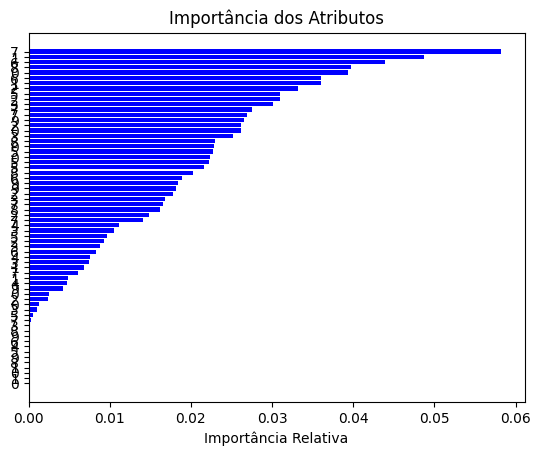

In [79]:
# Plot da importância dos atributos
plt.figure(1)
plt.title("Importância dos Atributos")
plt.barh(range(len(indices)), importancia[indices], color = "b", align="center")
plt.yticks(range(len(indices)), ind)
plt.xlabel("Importância Relativa")
plt.show()


## <font color='red'>Random Forest Classifier - 2</font>

In [80]:
!pip install treeinterpreter

In [81]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti
from sklearn.datasets import load_iris

In [82]:
iris = load_iris()

In [83]:
# Criando o classificador
rf = RandomForestClassifier(max_depth=4)

In [87]:
# Obtendo os índices a partir do comprimento da variável target
idx = list(range(len(iris.target)))

In [88]:
# rANDOMIZAR O ÍNDICE
np.random.shuffle(idx)

In [89]:
# Criando o modelo 
rf.fit(iris.data[idx][:100], iris.target[idx][:100])

RandomForestClassifier(max_depth=4)

In [90]:
?rf.predict_proba

Signature: rf.predict_proba(X)
Docstring:
Predict class probabilities for X.

The predicted class probabilities of an input sample are computed as
the mean predicted class probabilities of the trees in the forest.
The class probability of a single tree is the fraction of samples of
the same class in a leaf.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The input samples. Internally, its dtype will be converted to
    ``dtype=np.float32``. If a sparse matrix is provided, it will be
    converted into a sparse ``csr_matrix``.

Returns
-------
p : ndarray of shape (n_samples, n_classes), or a list of such arrays
    The class probabilities of the input samples. The order of the
    classes corresponds to that in the attribute :term:`classes_`.
File:      c:\users\alyss\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py
Type:      method


In [91]:
# Obttem as instâncias (exemplos ou observações) e retorna as probaBILIDADES
instance = iris.data[idx][100:101]
print(rf.predict_proba(instance))

[[0.         0.99650794 0.00349206]]


In [93]:
prediction, bias, contributions = ti.predict(rf, instance)
print(f"Previsões {prediction}")
print("Contribuição dos Atributos:")
for item, feature in zip(contributions[0], iris.feature_names):
 print(feature, item)

Previsões [[0.         0.99650794 0.00349206]]
Contribuição dos Atributos:
sepal length (cm) [-0.03653932  0.03893372 -0.0023944 ]
sepal width (cm) [-0.02613471  0.03237604 -0.00624133]
petal length (cm) [-0.17782109  0.27702697 -0.09920588]
petal width (cm) [-0.10710488  0.33567121 -0.22856633]


# <font color='orange'>Random Forest Regressor</font>

Nosso dataset possui registros de 81.312 Games Boards como esse: http://www.boardgamegeek.com/boardgame/167791/terraforming-mars

### Colunas no dataset:

https://github.com/ThaWeatherman/scrapers/tree/master/boardgamegeek

name – name of the board game.

playingtime – the playing time (given by the manufacturer).

minplaytime – the minimum playing time (given by the manufacturer).

maxplaytime – the maximum playing time (given by the manufacturer).

minage – the minimum recommended age to play.

users_rated – the number of users who rated the game.

average_rating – the average rating given to the game by users. (0-10)

total_weights – Number of weights given by users.  Weight is a subjective measure that is made up by BoardGameGeek. 

It’s how “deep” or involved a game is. Here’s a full explanation.

average_weight – the average of all the subjective weights (0-5).

Avarage Rating será o target

In [94]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # Não precisa para Random forest, apenas para comparar
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [95]:
# Carregando dataset
games = pd.read_csv("C:/formacao_dataScience_DSA_DADOS/04_machineLearning/Cap09/dados_python/games_data.csv")

In [96]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [97]:
games.shape

(81312, 20)

In [98]:
games.sample(10)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
45117,44678,boardgame,Strawberry Shortcake Berry Princess Hide and S...,2005.0,2.0,4.0,20.0,20.0,20.0,4.0,2,4.50000,0.00000,4,0,0,1,0,0,0.0000
70124,152123,boardgame,Dogfight,2013.0,2.0,4.0,45.0,45.0,45.0,10.0,0,0.00000,0.00000,3,0,0,1,0,0,0.0000
54735,96428,boardgame,Play the Sign,2011.0,2.0,8.0,15.0,15.0,15.0,7.0,1,8.00000,0.00000,3,0,0,0,1,0,0.0000
46234,55391,boardgame,Preventit,1994.0,2.0,6.0,0.0,0.0,0.0,6.0,0,0.00000,0.00000,3,1,0,0,1,0,0.0000
264,30869,boardgame,Thebes,2007.0,2.0,4.0,60.0,60.0,60.0,8.0,6734,7.21282,7.03889,7315,145,490,1577,2086,768,2.1732
49822,67932,boardgame,Face to Face: A Cubist Strategy Game,2009.0,2.0,4.0,30.0,30.0,30.0,8.0,13,2.84615,0.00000,34,5,0,0,5,0,0.0000
10731,20525,boardgame,Knock Out Whist,0.0,2.0,7.0,15.0,15.0,15.0,6.0,37,5.52973,5.50156,25,0,0,2,21,8,1.6250
62648,128655,boardgame,Jagdrevier,2012.0,2.0,5.0,30.0,30.0,30.0,8.0,9,5.50000,0.00000,15,1,1,2,3,1,2.0000
59154,115866,boardgame,Kuskalla,2012.0,2.0,3.0,20.0,20.0,20.0,0.0,0,0.00000,0.00000,1,0,0,0,1,0,0.0000
43349,41129,boardgame,Roll 'n Multiply,0.0,2.0,2.0,10.0,10.0,10.0,8.0,0,0.00000,0.00000,4,1,0,0,0,0,0.0000


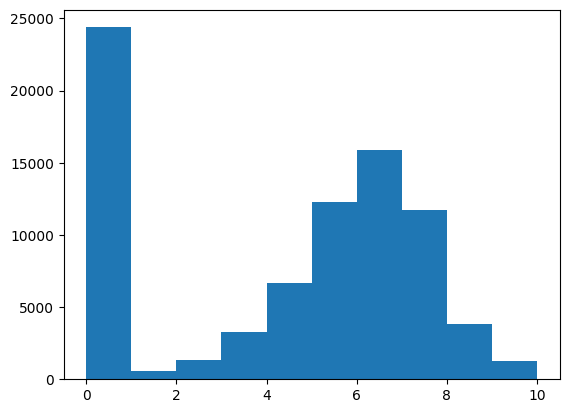

In [100]:
# Histograma com a média das avaliações
plt.hist(games["average_rating"])
plt.show()

In [103]:
# Visualizando as obserações com rating igual a 0
games[games["average_rating"] == 0]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [105]:
# Retornando a primeira linha do susbet do df, onde o índice é igual a 0
print(games[games["average_rating"] == 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object


In [106]:
# Retornando a primeira linha do susbet do df, onde o índice é maior que 0
print(games[games["average_rating"] > 0].iloc[0]) # iloc busca a entrada através do indice

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime                         180.0
minplaytime                         180.0
maxplaytime                         180.0
minage                               13.0
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [107]:
# Removendo as linhas sem avaliação dos Usuários
games = games[games["users_rated"] > 0]

In [108]:
# Removendo linhas com valores missing
games = games.dropna(axis = 0)

In [109]:
games.shape

(56894, 20)

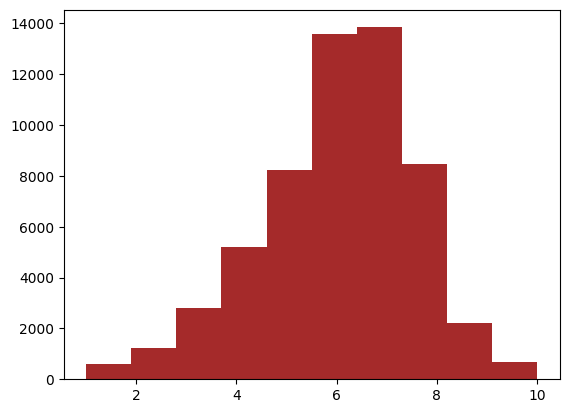

In [112]:
# Plotando novamente 
plt.hist(games.average_rating, color="brown")
plt.show()

In [114]:
# Verificando agora as correlações
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56894 non-null  int64  
 1   type                  56894 non-null  object 
 2   name                  56894 non-null  object 
 3   yearpublished         56894 non-null  float64
 4   minplayers            56894 non-null  float64
 5   maxplayers            56894 non-null  float64
 6   playingtime           56894 non-null  float64
 7   minplaytime           56894 non-null  float64
 8   maxplaytime           56894 non-null  float64
 9   minage                56894 non-null  float64
 10  users_rated           56894 non-null  int64  
 11  average_rating        56894 non-null  float64
 12  bayes_average_rating  56894 non-null  float64
 13  total_owners          56894 non-null  int64  
 14  total_traders         56894 non-null  int64  
 15  total_wanters         56

In [117]:
games.select_dtypes(include=['number']).corr() # retira as variaves do tipo object

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.002767,-0.050234,0.006141,-0.022017,-0.026729,-0.022017,0.099168,-0.057778,0.304201,-0.117172,-0.040308,-0.112069,0.017463,0.024777,-0.089659,-0.078830,-0.082301
yearpublished,0.002767,1.000000,0.004308,0.004977,0.006235,0.005245,0.006235,0.125281,0.037454,0.108461,0.140998,0.047740,0.064403,0.062289,0.052534,0.043818,0.036226,0.125318
minplayers,-0.050234,0.004308,1.000000,0.037155,0.024320,0.026569,0.024320,0.110886,0.020364,-0.032701,0.034915,0.014594,0.024708,-0.008654,-0.003786,0.023033,0.019061,-0.021892
maxplayers,0.006141,0.004977,0.037155,1.000000,-0.001020,-0.000950,-0.001020,0.004508,-0.000858,-0.008335,-0.003437,-0.000977,-0.002381,-0.003585,-0.002499,-0.001502,-0.001457,-0.013448
playingtime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minplaytime,-0.026729,0.005245,0.026569,-0.000950,0.967909,1.000000,0.967909,0.052454,0.005502,0.043985,0.041845,0.008975,0.014484,0.017491,0.012737,0.010046,0.010172,0.084405
maxplaytime,-0.022017,0.006235,0.024320,-0.001020,1.000000,0.967909,1.000000,0.053471,0.010908,0.048994,0.045341,0.014532,0.019264,0.024289,0.020296,0.016890,0.017789,0.090895
minage,0.099168,0.125281,0.110886,0.004508,0.053471,0.052454,0.053471,1.000000,0.097885,0.210049,0.266937,0.118564,0.152313,0.154097,0.137476,0.113395,0.097084,0.259782
users_rated,-0.057778,0.037454,0.020364,-0.000858,0.010908,0.005502,0.010908,0.097885,1.000000,0.112564,0.317992,0.977664,0.807873,0.702433,0.805116,0.978708,0.975723,0.150597
average_rating,0.304201,0.108461,-0.032701,-0.008335,0.048994,0.043985,0.048994,0.210049,0.112564,1.000000,0.231563,0.137478,0.119452,0.196566,0.171375,0.123714,0.109691,0.351081


In [124]:
# Obtém todas as colunas de um DF
colunas = games.columns.tolist()

In [125]:
colunas

['id',
 'type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [126]:
# Filtra as colunas e remove as que não são relevantes
colunas = [c for c in colunas if c not in ["bayes_average_rating",
                                           "average_rating",
                                           "type",
                                           "name"]]

In [128]:
# Preparando a variável target
target = "average_rating"

In [130]:
# Gerando dados de treino
df_treino = games.sample(frac = 0.8, random_state = 101)

In [133]:
# sELECIONA TUDO QUE NÃO ESTÁ NO DATASET DE TREINO E ARMAZENA NO DATASET DE TESTE
df_teste = games.loc[~games.index.isin(df_treino.index)]

# "~" simboliza o inverso

In [134]:
# Shape dos datasets
print(df_treino.shape)
print(df_teste.shape)

(45515, 20)
(11379, 20)


In [135]:
# Criando regressor - REGRESSÃO LINEAR
reg_v1 = LinearRegression()

In [136]:
# fit the model to the training data
modelo_v1 = reg_v1.fit(df_treino[colunas], df_treino[target])

In [144]:
# Fazendo previsões
previsoes = modelo_v1.predict(df_teste[colunas])

In [145]:
previsoes

array([8.31364561, 7.02153966, 6.24035609, ..., 7.0902447 , 7.09003977,
       7.09326903])

In [146]:
# Computando os erros entre valores observados e valores previstos
mean_squared_error(previsoes, df_teste[target])

1.8266209048760136

In [140]:
# Criando um regressor RANDOM FOREST
reg_v2 = RandomForestRegressor(n_estimators= 100, min_samples_leaf = 10, random_state = 101)

In [142]:
# Treinando o modelo 
modelo_v2 = reg_v2.fit(df_treino[colunas], df_treino[target])

In [147]:
# Fazendo previsões 
previsoes2 = modelo_v2.predict(df_teste[colunas])

In [148]:
mean_squared_error(previsoes2, df_teste[target])


1.3954102582085597

# <font color='red'>Métodos Ensemble geralmente são bem mais precisos - random forest é um deles</font>